In [14]:
! pip install tgan

In [3]:
! pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Using cached imbalanced_learn-0.11.0-py3-none-any.whl (235 kB)
  Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.0.1
    Uninstalling joblib-1.0.1:
      Successfully uninstalled joblib-1.0.1
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1


In [5]:
! pip install xgboost

In [1]:
import pandas as pd
import numpy as np

from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

from xgboost import XGBClassifier

In [2]:
X_train = pd.read_csv('FDS_noncovariate/non_X_train.csv')
X_test = pd.read_csv('FDS_noncovariate/non_X_test.csv')
y_train = pd.read_csv('FDS_noncovariate/non_y_train.csv')
y_test = pd.read_csv('FDS_noncovariate/non_y_test.csv')

In [3]:
data = pd.merge(X_train, y_train, on = 'Unnamed: 0')
data = data.drop(labels = 'Unnamed: 0', axis = 1)

In [4]:
data_1 = data[data['isFraud'] == 1]

In [5]:
data_1 = data_1.drop(labels = 'isFraud', axis = 1)

In [6]:
X_test = X_test.iloc[:, 1:]
y_test = y_test.iloc[:, 1]

# 1. TGAN 으로 데이터 생성

In [8]:
from tgan.model import TGANModel
tgan = TGANModel(data_1.columns.tolist(),
                max_epoch = 5,
                steps_per_epoch = 5000)

In [9]:
tgan.fit(data_1)




[1103 17:01:48 @input_source.py:222] Setting up the queue 'QueueInput/input_queue' for CPU prefetching ...








Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
[1103 17:01:48 @registry.py:126] gen/LSTM/00/FC input: [200, 100]

Instructions for updating:
Please use `layer.__call__` method instead.
[1103 17:01:48 @registry.py:134] gen/LSTM/00/FC output: [200, 100]
[1103 17:01:48 @registry.py:126] gen/LSTM/00/FC2 input: [200, 100]
[1103 17:01:48 @registry.py:134] gen/LSTM/00/FC2 output: [200, 8008]
[1103 17:01:48 @registry.py:126] gen/LSTM/00/FC3 input: [200, 8008]
[1103 17:01:48 @registry.py:134] gen/LSTM/00/FC3 output: [200, 100]
[1103 17:01:48 @registry.py:126] gen/LSTM/01/FC input: [200, 100]
[1103 17:01:48 @reg

[1103 17:01:49 @registry.py:134] gen/LSTM/10/FC3 output: [200, 100]
[1103 17:01:49 @registry.py:126] gen/LSTM/11/FC input: [200, 100]
[1103 17:01:49 @registry.py:134] gen/LSTM/11/FC output: [200, 100]
[1103 17:01:49 @registry.py:126] gen/LSTM/11/FC2 input: [200, 100]
[1103 17:01:49 @registry.py:134] gen/LSTM/11/FC2 output: [200, 166]
[1103 17:01:49 @registry.py:126] gen/LSTM/11/FC3 input: [200, 166]
[1103 17:01:49 @registry.py:134] gen/LSTM/11/FC3 output: [200, 100]
[1103 17:01:49 @registry.py:126] gen/LSTM/12/FC input: [200, 100]
[1103 17:01:49 @registry.py:134] gen/LSTM/12/FC output: [200, 100]
[1103 17:01:49 @registry.py:126] gen/LSTM/12/FC2 input: [200, 100]
[1103 17:01:49 @registry.py:134] gen/LSTM/12/FC2 output: [200, 265]
[1103 17:01:49 @registry.py:126] gen/LSTM/12/FC3 input: [200, 265]
[1103 17:01:49 @registry.py:134] gen/LSTM/12/FC3 output: [200, 100]
[1103 17:01:50 @registry.py:126] gen/LSTM/13/FC input: [200, 100]
[1103 17:01:50 @registry.py:134] gen/LSTM/13/FC output: [200

[1103 17:01:52 @registry.py:126] gen/LSTM/31/FC2 input: [200, 100]
[1103 17:01:52 @registry.py:134] gen/LSTM/31/FC2 output: [200, 2]
[1103 17:01:52 @registry.py:126] gen/LSTM/31/FC3 input: [200, 2]
[1103 17:01:52 @registry.py:134] gen/LSTM/31/FC3 output: [200, 100]
[1103 17:01:52 @registry.py:126] gen/LSTM/32/FC input: [200, 100]
[1103 17:01:52 @registry.py:134] gen/LSTM/32/FC output: [200, 100]
[1103 17:01:52 @registry.py:126] gen/LSTM/32/FC2 input: [200, 100]
[1103 17:01:52 @registry.py:134] gen/LSTM/32/FC2 output: [200, 2]
[1103 17:01:52 @registry.py:126] gen/LSTM/32/FC3 input: [200, 2]
[1103 17:01:52 @registry.py:134] gen/LSTM/32/FC3 output: [200, 100]
[1103 17:01:52 @registry.py:126] gen/LSTM/33/FC input: [200, 100]
[1103 17:01:52 @registry.py:134] gen/LSTM/33/FC output: [200, 100]
[1103 17:01:52 @registry.py:126] gen/LSTM/33/FC2 input: [200, 100]
[1103 17:01:52 @registry.py:134] gen/LSTM/33/FC2 output: [200, 2]
[1103 17:01:52 @registry.py:126] gen/LSTM/33/FC3 input: [200, 2]
[110

[1103 17:01:54 @registry.py:126] gen/LSTM/52/FC input: [200, 100]
[1103 17:01:54 @registry.py:134] gen/LSTM/52/FC output: [200, 100]
[1103 17:01:54 @registry.py:126] gen/LSTM/52/FC2 input: [200, 100]
[1103 17:01:54 @registry.py:134] gen/LSTM/52/FC2 output: [200, 2]
[1103 17:01:54 @registry.py:126] gen/LSTM/52/FC3 input: [200, 2]
[1103 17:01:54 @registry.py:134] gen/LSTM/52/FC3 output: [200, 100]
[1103 17:01:54 @registry.py:126] gen/LSTM/53/FC input: [200, 100]
[1103 17:01:54 @registry.py:134] gen/LSTM/53/FC output: [200, 100]
[1103 17:01:54 @registry.py:126] gen/LSTM/53/FC2 input: [200, 100]
[1103 17:01:54 @registry.py:134] gen/LSTM/53/FC2 output: [200, 2]
[1103 17:01:54 @registry.py:126] gen/LSTM/53/FC3 input: [200, 2]
[1103 17:01:54 @registry.py:134] gen/LSTM/53/FC3 output: [200, 100]
[1103 17:01:54 @registry.py:126] gen/LSTM/54/FC input: [200, 100]
[1103 17:01:54 @registry.py:134] gen/LSTM/54/FC output: [200, 100]
[1103 17:01:54 @registry.py:126] gen/LSTM/54/FC2 input: [200, 100]
[1



[1103 17:01:57 @registry.py:126] discrim/dis_fc_top input: [200, 110]
[1103 17:01:57 @registry.py:134] discrim/dis_fc_top output: [200, 1]

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



[1103 17:02:12 @logger.py:83] Existing log file 'output\logs\log.log' backuped to 'output\logs\log.log.1103-170212'
[1103 17:02:12 @logger.py:90] Argv: C:\Users\Kiwon\anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py -f C:\Users\Kiwon\AppData\Roaming\jupyter\runtime\kernel-805e4609-f7dd-4a07-9180-e0550c860db0.json


[1103 17:02:12 @model_utils.py:67] List of Trainable Variables: 
na

[1103 17:02:12 @base.py:209] Setup callbacks graph ...






[1103 17:02:13 @summary.py:46] [MovingAverageSummary] 6 operations in collection 'MOVING_SUMMARY_OPS' will be run with session hooks.
[1103 17:02:13 @summary.py:93] Summarizing collection 'summaries' of size 9.

[1103 17:02:13 @graph.py:98] Applying collection UPDATE_OPS of 4 ops.



[1103 17:02:17 @sessinit.py:87] WRN The following variables are in the checkpoint, but not found in the graph: gen/LSTM/71/FC/W, gen/LSTM/71/FC/b, gen/LSTM/71/FC2/W, gen/LSTM/71/FC2/b, gen/LSTM/71/FC3/W, gen/LSTM/71/FC3/b, gen/LSTM/71/attw
[1103 17:02:18 @base.py:230] Creating the session ...


Instructions for updating:
Please use tensorflow.python.ops.op_selector.get_backward_walk_ops.



[1103 17:02:25 @base.py:236] Initializing the session ...
[1103 17:02:25 @sessinit.py:114] Restoring checkpoint from output\model\model-6500 ...
INFO:tensorflow:Restoring parameters from output\model\model-6500


InvalidArgumentError: Restoring from checkpoint failed. This is most likely due to a mismatch between the current graph and the graph from the checkpoint. Please ensure that you have not altered the graph expected based on the checkpoint. Original error:

Assign requires shapes of both tensors to match. lhs shape= [22446,100] rhs shape= [22447,100]
	 [[node 1416786388536/Assign_27 (defined at \anaconda3\envs\pytorch\lib\site-packages\tensorflow_core\python\framework\ops.py:1748) ]]

Original stack trace for '1416786388536/Assign_27':
  File "\anaconda3\envs\pytorch\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "\anaconda3\envs\pytorch\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "\anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "\anaconda3\envs\pytorch\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "\anaconda3\envs\pytorch\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
    self.io_loop.start()
  File "\anaconda3\envs\pytorch\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
    self.asyncio_loop.run_forever()
  File "\anaconda3\envs\pytorch\lib\asyncio\base_events.py", line 541, in run_forever
    self._run_once()
  File "\anaconda3\envs\pytorch\lib\asyncio\base_events.py", line 1786, in _run_once
    handle._run()
  File "\anaconda3\envs\pytorch\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "\anaconda3\envs\pytorch\lib\site-packages\ipykernel\kernelbase.py", line 457, in dispatch_queue
    await self.process_one()
  File "\anaconda3\envs\pytorch\lib\site-packages\ipykernel\kernelbase.py", line 446, in process_one
    await dispatch(*args)
  File "\anaconda3\envs\pytorch\lib\site-packages\ipykernel\kernelbase.py", line 353, in dispatch_shell
    await result
  File "\anaconda3\envs\pytorch\lib\site-packages\ipykernel\kernelbase.py", line 648, in execute_request
    reply_content = await reply_content
  File "\anaconda3\envs\pytorch\lib\site-packages\ipykernel\ipkernel.py", line 353, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "\anaconda3\envs\pytorch\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "\anaconda3\envs\pytorch\lib\site-packages\IPython\core\interactiveshell.py", line 2915, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "\anaconda3\envs\pytorch\lib\site-packages\IPython\core\interactiveshell.py", line 2960, in _run_cell
    return runner(coro)
  File "\anaconda3\envs\pytorch\lib\site-packages\IPython\core\async_helpers.py", line 78, in _pseudo_sync_runner
    coro.send(None)
  File "\anaconda3\envs\pytorch\lib\site-packages\IPython\core\interactiveshell.py", line 3186, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "\anaconda3\envs\pytorch\lib\site-packages\IPython\core\interactiveshell.py", line 3377, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "\anaconda3\envs\pytorch\lib\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "\AppData\Local\Temp/ipykernel_5984/3791037914.py", line 1, in <module>
    tgan.fit(data_1)
  File "\anaconda3\envs\pytorch\lib\site-packages\tgan\model.py", line 716, in fit
    starting_epoch=starting_epoch
  File "\anaconda3\envs\pytorch\lib\site-packages\tensorpack\train\base.py", line 344, in train_with_defaults
    steps_per_epoch, starting_epoch, max_epoch)
  File "\anaconda3\envs\pytorch\lib\site-packages\tensorpack\train\base.py", line 315, in train
    self.initialize(session_creator, session_init)
  File "\anaconda3\envs\pytorch\lib\site-packages\tensorpack\utils\argtools.py", line 176, in wrapper
    return func(*args, **kwargs)
  File "\anaconda3\envs\pytorch\lib\site-packages\tensorpack\train\tower.py", line 152, in initialize
    super(TowerTrainer, self).initialize(session_creator, session_init)
  File "\anaconda3\envs\pytorch\lib\site-packages\tensorpack\utils\argtools.py", line 176, in wrapper
    return func(*args, **kwargs)
  File "\anaconda3\envs\pytorch\lib\site-packages\tensorpack\train\base.py", line 228, in initialize
    session_init._setup_graph()
  File "\anaconda3\envs\pytorch\lib\site-packages\tensorpack\tfutils\sessinit.py", line 111, in _setup_graph
    self.saver = tf.train.Saver(var_list=dic, name=str(id(dic)))
  File "\anaconda3\envs\pytorch\lib\site-packages\tensorflow_core\python\training\saver.py", line 828, in __init__
    self.build()
  File "\anaconda3\envs\pytorch\lib\site-packages\tensorflow_core\python\training\saver.py", line 840, in build
    self._build(self._filename, build_save=True, build_restore=True)
  File "\anaconda3\envs\pytorch\lib\site-packages\tensorflow_core\python\training\saver.py", line 878, in _build
    build_restore=build_restore)
  File "\anaconda3\envs\pytorch\lib\site-packages\tensorflow_core\python\training\saver.py", line 508, in _build_internal
    restore_sequentially, reshape)
  File "\anaconda3\envs\pytorch\lib\site-packages\tensorflow_core\python\training\saver.py", line 350, in _AddRestoreOps
    assign_ops.append(saveable.restore(saveable_tensors, shapes))
  File "\anaconda3\envs\pytorch\lib\site-packages\tensorflow_core\python\training\saving\saveable_object_util.py", line 73, in restore
    self.op.get_shape().is_fully_defined())
  File "\anaconda3\envs\pytorch\lib\site-packages\tensorflow_core\python\ops\state_ops.py", line 227, in assign
    validate_shape=validate_shape)
  File "\anaconda3\envs\pytorch\lib\site-packages\tensorflow_core\python\ops\gen_state_ops.py", line 66, in assign
    use_locking=use_locking, name=name)
  File "\anaconda3\envs\pytorch\lib\site-packages\tensorflow_core\python\framework\op_def_library.py", line 794, in _apply_op_helper
    op_def=op_def)
  File "\anaconda3\envs\pytorch\lib\site-packages\tensorflow_core\python\util\deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "\anaconda3\envs\pytorch\lib\site-packages\tensorflow_core\python\framework\ops.py", line 3357, in create_op
    attrs, op_def, compute_device)
  File "\anaconda3\envs\pytorch\lib\site-packages\tensorflow_core\python\framework\ops.py", line 3426, in _create_op_internal
    op_def=op_def)
  File "\anaconda3\envs\pytorch\lib\site-packages\tensorflow_core\python\framework\ops.py", line 1748, in __init__
    self._traceback = tf_stack.extract_stack()


In [11]:
model_path = 'models/mymodel.pkl'
tgan.save(model_path)

AttributeError: 'TGANModel' object has no attribute 'simple_dataset_predictor'

In [13]:
samples = tgan.sample(80000)
samples.head()

AttributeError: 'TGANModel' object has no attribute 'simple_dataset_predictor'

In [ ]:
samples.to_csv('TGAN_train_sample.csv')

In [7]:
TGAN_data = pd.read_csv('TGAN_train_sample.csv')

In [8]:
TGAN_data = TGAN_data.drop(labels = 'Unnamed: 0' , axis = 1)


In [16]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X_pca = pca.fit_transform(data_1)
df_X_pca = pd.DataFrame(X_pca)

pca_TGAN = PCA(n_components = 2)
X_pca_TGAN = pca_TGAN.fit_transform(TGAN_data)
df_X_pca_TGAN = pd.DataFrame(X_pca_TGAN)

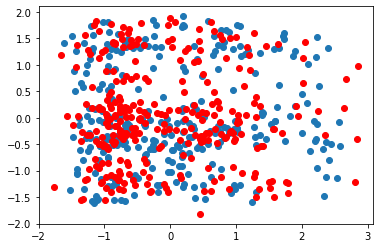

In [17]:
plt.scatter(df_X_pca.sample(n= 300).iloc[:,0], df_X_pca.sample(n= 300).iloc[:,1])
plt.scatter(df_X_pca_TGAN.sample(n= 300).iloc[:,0], df_X_pca_TGAN.sample(n= 300).iloc[:,1], color = 'red' )

In [18]:
plt.savefig('TGAN과 Original 데이터의 PCA 분포.png')

<Figure size 432x288 with 0 Axes>

In [19]:
TGAN_data['isFraud'] = 1
TGAN_data

,TransactionDT,TransactionAmt,card1,card2,card3,card5,C1,C2,C3,C4,...,id_12,id_16,id_28,id_29,id_35,id_36,id_37,id_38,DeviceType,isFraud
0,0.812583,-0.914336,-0.007473,0.780,0.297710,-0.459854,-0.999146,-0.992620,-1.0,-0.999112,...,1,0,0,0,0,0,1,0,0,1
1,0.812583,-0.914336,-0.007473,0.232,0.297710,0.810219,-0.998719,-0.999297,-1.0,-0.999112,...,1,0,0,0,0,0,1,0,1,1
2,0.812583,-0.889152,-0.814210,0.820,-0.236641,0.839416,-0.999146,-0.998243,-1.0,-0.998225,...,0,0,0,0,1,0,1,1,0,1
3,0.812583,-0.833589,-0.007473,-0.216,0.297710,-0.459854,-0.999573,-0.999297,-1.0,-0.999112,...,1,0,0,0,0,0,1,1,0,1
4,0.812583,-0.983610,-0.446769,-0.880,0.297710,0.810219,-0.997439,-0.997189,-1.0,-0.995561,...,1,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,0.812583,-0.889152,-0.007473,-0.092,0.297710,0.839416,-0.999573,-0.998946,-1.0,-0.999112,...,1,0,0,0,0,0,1,1,1,1
79996,0.812583,-0.889152,-0.814210,0.196,-0.236641,0.737226,-0.999146,-0.999649,-1.0,-0.998225,...,0,0,0,0,1,0,1,0,1,1
79997,0.812583,-0.914336,-0.077259,0.780,0.297710,0.839416,-0.999573,-0.999649,-1.0,-0.999112,...,1,0,0,0,0,0,1,0,1,1
79998,0.812583,-0.833589,-0.752357,0.232,0.297710,0.810219,-0.999146,-0.999297,-1.0,-0.998225,...,1,0,0,0,0,0,1,0,1,1


In [20]:
TGAN_data

,TransactionDT,TransactionAmt,card1,card2,card3,card5,C1,C2,C3,C4,...,id_12,id_16,id_28,id_29,id_35,id_36,id_37,id_38,DeviceType,isFraud
0,0.812583,-0.914336,-0.007473,0.780,0.297710,-0.459854,-0.999146,-0.992620,-1.0,-0.999112,...,1,0,0,0,0,0,1,0,0,1
1,0.812583,-0.914336,-0.007473,0.232,0.297710,0.810219,-0.998719,-0.999297,-1.0,-0.999112,...,1,0,0,0,0,0,1,0,1,1
2,0.812583,-0.889152,-0.814210,0.820,-0.236641,0.839416,-0.999146,-0.998243,-1.0,-0.998225,...,0,0,0,0,1,0,1,1,0,1
3,0.812583,-0.833589,-0.007473,-0.216,0.297710,-0.459854,-0.999573,-0.999297,-1.0,-0.999112,...,1,0,0,0,0,0,1,1,0,1
4,0.812583,-0.983610,-0.446769,-0.880,0.297710,0.810219,-0.997439,-0.997189,-1.0,-0.995561,...,1,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,0.812583,-0.889152,-0.007473,-0.092,0.297710,0.839416,-0.999573,-0.998946,-1.0,-0.999112,...,1,0,0,0,0,0,1,1,1,1
79996,0.812583,-0.889152,-0.814210,0.196,-0.236641,0.737226,-0.999146,-0.999649,-1.0,-0.998225,...,0,0,0,0,1,0,1,0,1,1
79997,0.812583,-0.914336,-0.077259,0.780,0.297710,0.839416,-0.999573,-0.999649,-1.0,-0.999112,...,1,0,0,0,0,0,1,0,1,1
79998,0.812583,-0.833589,-0.752357,0.232,0.297710,0.810219,-0.999146,-0.999297,-1.0,-0.998225,...,1,0,0,0,0,0,1,0,1,1


In [21]:
data

,TransactionDT,TransactionAmt,card1,card2,card3,card5,C1,C2,C3,C4,...,id_12,id_16,id_28,id_29,id_35,id_36,id_37,id_38,DeviceType,isFraud
0,0.797352,-0.861371,-0.691653,-0.344,-0.236641,-0.094891,-0.999573,-0.999649,-1.0,-0.999112,...,1,0,0,0,1,0,1,0,0,0
1,0.834505,-0.944716,0.173488,0.044,-0.236641,0.839416,-0.998292,-0.999297,-1.0,-0.993786,...,0,0,0,0,1,0,1,1,0,0
2,-0.989069,-0.977181,-0.752357,0.232,0.297710,0.810219,-0.998719,-0.996134,-1.0,-0.999112,...,1,1,0,0,0,0,1,1,0,0
3,0.548674,-0.985795,-0.119568,-0.836,0.297710,-0.401460,-0.999146,-0.998946,-1.0,-0.998225,...,1,0,0,0,0,0,1,0,0,1
4,-0.738940,-0.944716,0.173488,0.044,-0.236641,0.839416,-0.999573,-0.999649,-1.0,-0.999112,...,1,1,1,1,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100958,0.957592,-0.972131,0.711313,0.780,0.297710,-0.445255,-0.999573,-0.999297,-1.0,-0.999112,...,1,1,1,1,0,0,1,0,1,0
100959,-0.606162,-0.916934,0.344562,0.560,-0.236641,0.839416,-0.999573,-0.999649,-1.0,-0.999112,...,1,0,0,0,1,0,1,1,0,0
100960,-0.851784,-0.722462,0.139112,-0.068,-0.236641,0.839416,-0.999146,-0.999649,-1.0,-0.998225,...,0,0,0,0,1,0,1,0,0,0
100961,0.754076,-0.972497,-0.814210,-0.092,-0.236641,-0.970803,-0.999573,-0.999649,-1.0,-0.999112,...,0,0,0,0,1,0,1,0,0,1


In [22]:
print(data['isFraud'].value_counts())
data

0    92952
1     8011
Name: isFraud, dtype: int64


,TransactionDT,TransactionAmt,card1,card2,card3,card5,C1,C2,C3,C4,...,id_12,id_16,id_28,id_29,id_35,id_36,id_37,id_38,DeviceType,isFraud
0,0.797352,-0.861371,-0.691653,-0.344,-0.236641,-0.094891,-0.999573,-0.999649,-1.0,-0.999112,...,1,0,0,0,1,0,1,0,0,0
1,0.834505,-0.944716,0.173488,0.044,-0.236641,0.839416,-0.998292,-0.999297,-1.0,-0.993786,...,0,0,0,0,1,0,1,1,0,0
2,-0.989069,-0.977181,-0.752357,0.232,0.297710,0.810219,-0.998719,-0.996134,-1.0,-0.999112,...,1,1,0,0,0,0,1,1,0,0
3,0.548674,-0.985795,-0.119568,-0.836,0.297710,-0.401460,-0.999146,-0.998946,-1.0,-0.998225,...,1,0,0,0,0,0,1,0,0,1
4,-0.738940,-0.944716,0.173488,0.044,-0.236641,0.839416,-0.999573,-0.999649,-1.0,-0.999112,...,1,1,1,1,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100958,0.957592,-0.972131,0.711313,0.780,0.297710,-0.445255,-0.999573,-0.999297,-1.0,-0.999112,...,1,1,1,1,0,0,1,0,1,0
100959,-0.606162,-0.916934,0.344562,0.560,-0.236641,0.839416,-0.999573,-0.999649,-1.0,-0.999112,...,1,0,0,0,1,0,1,1,0,0
100960,-0.851784,-0.722462,0.139112,-0.068,-0.236641,0.839416,-0.999146,-0.999649,-1.0,-0.998225,...,0,0,0,0,1,0,1,0,0,0
100961,0.754076,-0.972497,-0.814210,-0.092,-0.236641,-0.970803,-0.999573,-0.999649,-1.0,-0.999112,...,0,0,0,0,1,0,1,0,0,1


### 과적합을 방지하기 위해, train set에서만 불균형 데이터 처리를 가한다.

# 2. 모델링

In [9]:
X = data.iloc[:,:-1]
y = data['isFraud']

X_train_TGAN, X_test_TGAN, y_train_TGAN, y_test_TGAN = train_test_split(X, y, test_size = 0.3)

In [10]:
X_train_TGAN = X_train_TGAN.append(TGAN_data.iloc[:,:-1])

In [11]:
y_train_TGAN = y_train_TGAN.append(TGAN_data['isFraud'])

In [26]:
lr = LogisticRegression(penalty = 'l1', C = 0.1, solver = 'saga', max_iter = 100)
lr.fit(X_train_TGAN, y_train_TGAN)
pred = lr.predict(X_test)

C:\Users\Kiwon\anaconda3\envs\pytorch\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [27]:
print("Accuracy :", accuracy_score(y_test, pred))
print("Precision :", precision_score(y_test, pred))
print("Recall :", recall_score(y_test, pred))
print("f1_score :", f1_score(y_test, pred))
print("ROC_AUC :", roc_auc_score(y_test, pred))

Accuracy : 0.8774439565518836
Precision : 0.23901673640167365
Recall : 0.2763834290898095
f1_score : 0.25634553358575235
ROC_AUC : 0.6017830365177297


In [24]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train_TGAN, y_train_TGAN)
pred = dtc.predict(X_test)

In [25]:
print("Accuracy :", accuracy_score(y_test, pred))
print("Precision :", precision_score(y_test, pred))
print("Recall :", recall_score(y_test, pred))
print("f1_score :", f1_score(y_test, pred))
print("ROC_AUC :", roc_auc_score(y_test, pred))

Accuracy : 0.94756182112318
Precision : 0.6486254295532646
Recall : 0.6849107952827336
f1_score : 0.6662744521253126
ROC_AUC : 0.8271036973185683


In [20]:
rf = RandomForestClassifier()
rf.fit(X_train_TGAN, y_train_TGAN)
pred = rf.predict(X_test)

In [21]:
print("Accuracy :", accuracy_score(y_test, pred))
print("Precision :", precision_score(y_test, pred))
print("Recall :", recall_score(y_test, pred))
print("f1_score :", f1_score(y_test, pred))
print("ROC_AUC :", roc_auc_score(y_test, pred))

Accuracy : 0.9703258608735845
Precision : 0.9485587583148559
Recall : 0.6468097973994557
f1_score : 0.7691477885652643
ROC_AUC : 0.8219535562079229


In [32]:
xgb = XGBClassifier()
xgb.fit(X_train_TGAN, y_train_TGAN)
pred = xgb.predict(X_test)

In [33]:
print("Accuracy :", accuracy_score(y_test, pred))
print("Precision :", precision_score(y_test, pred))
print("Recall :", recall_score(y_test, pred))
print("f1_score :", f1_score(y_test, pred))
print("ROC_AUC :", roc_auc_score(y_test, pred))

Accuracy : 0.9703258608735845
Precision : 0.9054108216432866
Recall : 0.6830964620501966
f1_score : 0.7786970010341261
ROC_AUC : 0.8385954997486676


In [28]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(solver = 'adam', hidden_layer_sizes = (32, 16, 4),
                   activation = 'relu')

mlp.fit(X_train_TGAN, y_train_TGAN)
pred = mlp.predict(X_test)

In [29]:
print("Accuracy :", accuracy_score(y_test, pred))
print("Precision :", precision_score(y_test, pred))
print("Recall :", recall_score(y_test, pred))
print("f1_score :", f1_score(y_test, pred))
print("ROC_AUC :", roc_auc_score(y_test, pred))

Accuracy : 0.9289577074185348
Precision : 0.5405499477897668
Recall : 0.46960991835500454
f1_score : 0.5025889967637541
ROC_AUC : 0.7182896825466187


# 3. SMOTE / original 과 TGAN origianl 분포 비교

In [34]:
X_train = X_train.iloc[:, 1:]
y_train = y_train.iloc[:, 1]

In [35]:
smote = SMOTE()

X_train_SMT, y_train_SMT = smote.fit_resample(X_train, y_train)

In [36]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X_pca = pca.fit_transform(data_1)
df_X_pca = pd.DataFrame(X_pca)

pca_TGAN = PCA(n_components = 2)
X_pca_TGAN = pca_TGAN.fit_transform(TGAN_data)
df_X_pca_TGAN = pd.DataFrame(X_pca_TGAN)

pca_SMT = PCA(n_components = 2)
X_pca_SMT = pca_SMT.fit_transform(X_train_SMT)
df_X_pca_SMT= pd.DataFrame(X_pca_SMT)

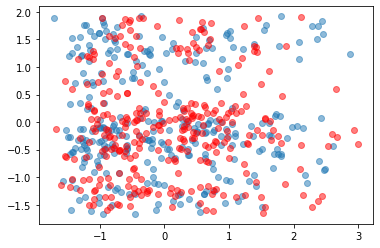

In [37]:
plt.scatter(df_X_pca.sample(n= 300).iloc[:,0], df_X_pca.sample(n= 300).iloc[:,1] , alpha = 0.5)
plt.scatter(df_X_pca_TGAN.sample(n= 300).iloc[:,0], df_X_pca_TGAN.sample(n= 300).iloc[:,1], color = 'red'
            , alpha = 0.5)

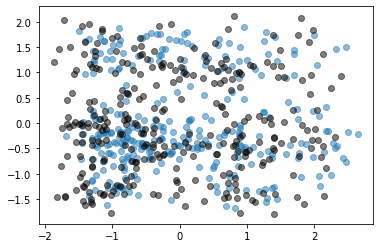

In [38]:
plt.scatter(df_X_pca.sample(n= 300).iloc[:,0], df_X_pca.sample(n= 300).iloc[:,1] , alpha = 0.5)
plt.scatter(df_X_pca_SMT.sample(n= 300).iloc[:,0], df_X_pca_SMT.sample(n= 300).iloc[:,1], color = 'black' 
            , alpha = 0.5)

In [39]:
X_test

,TransactionDT,TransactionAmt,card1,card2,card3,card5,C1,C2,C3,C4,...,DeviceInfo_iOS Device,id_12,id_16,id_28,id_29,id_35,id_36,id_37,id_38,DeviceType
0,0.317492,-0.956771,-0.792941,-0.880,0.297710,-0.459854,-0.999573,-0.999649,-1.0,-0.999112,...,0,1,1,1,1,0,0,1,0,1
1,0.541448,-0.944716,-0.242929,0.812,-0.236641,0.839416,-0.999573,-0.999649,-1.0,-0.999112,...,0,1,1,1,1,1,0,0,0,0
2,0.316077,-0.555772,0.279949,-0.956,-0.236641,-0.576642,-0.999146,-0.999649,-1.0,-0.999112,...,0,0,0,0,0,1,0,1,1,0
3,0.119918,-0.722462,0.972752,0.560,-0.236641,0.313869,-0.999573,-0.999649,-1.0,-0.999112,...,0,1,1,1,1,1,0,1,0,0
4,0.483893,-0.916934,-0.916762,0.932,-0.236641,0.839416,-0.999573,-0.999649,-1.0,-0.999112,...,1,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43265,-0.399537,-0.966941,0.974822,0.820,-0.236641,0.839416,-0.999573,-0.999649,-1.0,-0.999112,...,0,1,1,1,1,1,0,1,1,1
43266,-0.994551,-0.972497,0.524373,-0.956,-0.236641,0.839416,-0.998719,-0.999297,-1.0,-0.999112,...,0,0,0,0,0,1,0,1,1,0
43267,-0.991509,-0.750244,0.355024,0.196,-0.236641,-0.970803,-0.996585,-0.997189,-1.0,-0.998225,...,0,1,0,0,0,1,0,1,0,0
43268,-0.470785,-0.988812,0.639112,0.100,0.297710,0.810219,-0.999573,-0.999649,-1.0,-0.999112,...,0,1,1,1,1,0,0,1,0,1


In [40]:
X_test_TGAN

,TransactionDT,TransactionAmt,card1,card2,card3,card5,C1,C2,C3,C4,...,DeviceInfo_iOS Device,id_12,id_16,id_28,id_29,id_35,id_36,id_37,id_38,DeviceType
36283,-0.804113,-0.166829,-0.945390,0.196,-0.236641,0.562044,-0.999573,-0.999649,-1.0,-0.999112,...,0,0,0,0,0,1,0,1,1,0
94984,0.958064,-0.969535,-0.855599,0.780,0.297710,0.839416,-0.996585,-0.997891,-1.0,-0.999112,...,0,1,0,0,0,0,0,1,0,1
5186,-0.812655,-0.980843,0.711313,0.780,0.297710,-0.445255,-0.999573,-0.999649,-1.0,-0.999112,...,0,1,0,1,1,0,0,0,1,1
91771,0.605071,-0.972497,-0.866981,-0.956,-0.236641,0.839416,-0.999573,-0.999649,-1.0,-0.999112,...,1,1,1,1,1,1,0,1,1,1
80950,-0.871729,-0.778026,-0.897333,0.656,-0.236641,0.810219,-0.999573,-0.999649,-1.0,-0.999112,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10322,-0.704118,-0.958426,-0.362612,-0.036,0.297710,0.839416,-0.999573,-0.999649,-1.0,-0.999112,...,0,1,1,1,1,0,0,1,1,0
4694,-0.783157,-0.778026,-0.738101,0.412,-0.236641,0.839416,-0.999573,-0.999649,-1.0,-0.999112,...,0,1,1,1,1,1,0,1,0,0
23458,-0.739890,-0.916934,-0.422971,0.932,-0.236641,0.839416,-0.999573,-0.999649,-1.0,-0.999112,...,1,1,1,1,1,1,0,0,0,1
88794,0.864645,-0.965025,-0.887790,0.780,0.297710,-0.970803,-0.999146,-0.999297,-1.0,-0.999112,...,0,1,0,0,0,0,0,1,0,0
